In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

fsize = 8
tsize = 8
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
# plot_kwargs = dict(marker='.', markersize=3, lw=1)
# errband_kwargs = dict(alpha=0.25)
errbar_kwargs = dict(estimator='mean', errorbar=('ci', 95), errwidth=1.25, capsize=0.05,)

save_dir = '../tmlr/figs/experiments'

In [2]:
group_attn_df = pd.read_csv('figure_data/relational_games/group_attn/run_history.csv')

In [3]:
group_attn_df.head()

,_step,epoch/val_loss,epoch/group_attn_entropy,epoch/learning_rate,_runtime,epoch/val_group_attn_entropy,epoch/loss,epoch/epoch,epoch/val_acc,epoch/acc,...,hexos_group_attn_entropy,group_attn_entropy,stripes_group_attn_entropy,stripes_loss,acc,hexos_acc,loss,group_attn_scores,stripes_acc,hexos_loss
0,0,4.063721,3.470094,0.001,249.886801,3.370587,4.163628,0.0,0.510,0.497553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3.720439,3.206696,0.001,428.458457,3.027298,3.900018,1.0,0.506,0.499447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.351776,2.839692,0.001,606.964325,2.658561,3.533035,2.0,0.499,0.500328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.049260,2.501671,0.001,784.225587,2.356017,3.194994,3.0,0.489,0.499832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2.802809,2.229833,0.001,962.614866,2.109872,2.923135,4.0,0.520,0.498820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
group_attn_df.columns

Index(['_step', 'epoch/val_loss', 'epoch/group_attn_entropy',
       'epoch/learning_rate', '_runtime', 'epoch/val_group_attn_entropy',
       'epoch/loss', 'epoch/epoch', 'epoch/val_acc', 'epoch/acc', '_timestamp',
       'graphlet_size', 'wandb_project_name', 'task', 'n_filters',
       'mdipr_rel_dim', 'test_split_size', 'n_groups', 'test_size',
       'mdipr_symmetric', 'train_size', 'two_layer', 'group_attn_key',
       'learning_rate', 'mdipr_proj_dim', 'dropout', 'val_size', 'batch_size',
       'group_attn_key_dim', 'early_stopping', 'seed', 'entropy_reg_scale',
       'run_name', 'n_epochs', 'entropy_reg', 'train_split',
       'ignore_gpu_assert', 'symmetric_inner_prod', 'group', 'name',
       'hexos_group_attn_entropy', 'group_attn_entropy',
       'stripes_group_attn_entropy', 'stripes_loss', 'acc', 'hexos_acc',
       'loss', 'group_attn_scores', 'stripes_acc', 'hexos_loss'],
      dtype='object')

In [5]:
group_attn_df['Group Attention Entropy'] = group_attn_df['epoch/val_group_attn_entropy'] / group_attn_df['entropy_reg_scale']
group_attn_df['Cross-entropy Loss'] = group_attn_df['epoch/val_loss'] - group_attn_df['epoch/val_group_attn_entropy']

c:\Users\awnya\miniconda3\envs\attention\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\awnya\miniconda3\envs\attention\lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


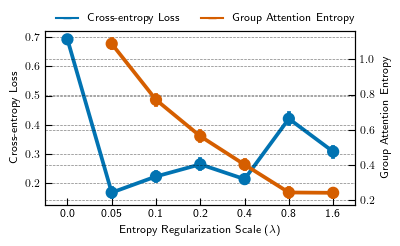

In [6]:
from matplotlib.lines import Line2D

fig_data = group_attn_df.copy()
fig_data = fig_data[fig_data.mdipr_rel_dim == 16]
fig_data.rename(columns={'epoch/epoch': 'Epoch', 'entropy_reg_scale': 'Entropy Regularization Scale ($\lambda$)'}, inplace=True)

cmap = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(4, 2.25))
sns.pointplot(x='Entropy Regularization Scale ($\lambda$)', y='Cross-entropy Loss', color=cmap[0],
    data=fig_data, ax=ax)
sns.pointplot(x='Entropy Regularization Scale ($\lambda$)', y='Group Attention Entropy', color=cmap[3],
    data=fig_data, ax=ax.twinx())
fig.legend(
    handles=[Line2D([], [], marker='_', color=cmap[0], label='Cross-entropy Loss'), Line2D([], [], marker='_', color=cmap[3], label='Group Attention Entropy')],
    loc='upper center', ncol=2, bbox_to_anchor=(0.525, 1.), frameon=False)
# sns.move_legend(ax, "lower center", ncol=4, bbox_to_anchor=(-0.1, -0.5), frameon=False)


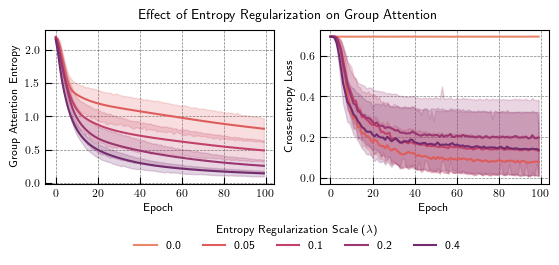

In [7]:
fig_data = group_attn_df.copy()
fig_data = fig_data[(fig_data.mdipr_rel_dim == 16) & (fig_data['entropy_reg_scale'].isin([0.0, 0.05, 0.1, 0.2, 0.4]))]
fig_data.rename(columns={'epoch/epoch': 'Epoch', 'entropy_reg_scale': 'Entropy Regularization Scale ($\lambda$)'}, inplace=True)

palette = sns.color_palette('flare', n_colors=5)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6.5, 2))
sns.lineplot(x='Epoch', y='Group Attention Entropy', hue='Entropy Regularization Scale ($\lambda$)', palette=palette,
    data=fig_data, ax=ax1, legend=False) # todo: change err band type? 1 sem? 
sns.lineplot(x='Epoch', y='Cross-entropy Loss', hue='Entropy Regularization Scale ($\lambda$)', palette=palette,
    data=fig_data, ax=ax2)
# sns.move_legend(ax1, "center right")
sns.move_legend(ax2, "lower center", ncol=5, bbox_to_anchor=(-0.1, -0.5), frameon=False)
fig.suptitle('Effect of Entropy Regularization on Group Attention');


In [8]:
# fig.set_tight_layout(True)
# fig.savefig(f'{save_dir}/group_attn_entropy.pdf', bbox_inches='tight')